In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ema_trader import EMA_trader

In [2]:
history = pd.read_csv('./binance_DOGEBTC_1m.csv') # dogecoin data
history = history.iloc[0:80000]
prices = history['open'].tolist()

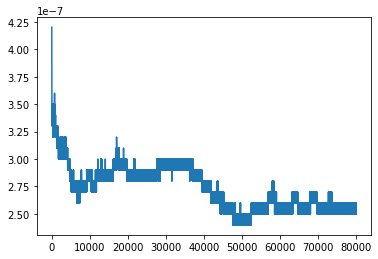

In [3]:
plt.plot(prices)

In [ ]:
tr = EMA_trader()

optimization_period = 5000

# quantities of Doge/BTC
parameters = tr.optimize(prices[:optimization_period])
tr.set_params(*parameters)

doge, BTC = 50, 50
bt = np.zeros_like(prices[optimization_period:])
dg = np.zeros_like(prices[optimization_period:])

prev_price = prices[optimization_period - 1]

num_buys = num_sells = 0

for i, price in enumerate(prices[optimization_period:], optimization_period):
    percent_change = (price - prev_price) / prev_price
    doge *= 1 + percent_change

    action = tr.action(price)
    if action == tr.OrderSide.BUY:  # buy
        if BTC > 0:
            doge += .999 * BTC
            BTC = 0
            num_buys += 1
    elif action == tr.OrderSide.SELL:  # sell
        if doge > 0:
            BTC += 0.999 * doge
            doge = 0
            num_sells += 1

    if BTC + doge < 1e-9:
        print('Bust')
        break

    bt[i-1] = BTC
    dg[i-1] = doge
    prev_price = price

    # why do this in 2 steps? because we could potentially throw the
    # call to `tr.optimize` into its own thread, and update tr once it is done.
    if (i+1) % optimization_period == 0:
        t0 = time.perf_counter()
        parameters = tr.optimize(prices[i-optimization_period:i])
        tr.set_params(*parameters)
        print(f"{100 * (i - optimization_period) / (len(prices) - optimization_period):.2f}%: Optimized in {time.perf_counter() - t0:.2f} s")
        print(f"BTC: {BTC}\tDOGE: {doge}\tNUM BUYS: {num_buys}\tNUM SELLS: {num_sells}")

269.584 (0.0, 0, 0.7, 3)
36907606.016 (0.0, 0, 0.9, 1)
6.67%: Optimized in 27.52 s
BTC: 0	DOGE: 62.042426717079124	NUM BUYS: 7	NUM SELLS: 7
10025087.388 (0.0, 0, 0.1, 6)
13.33%: Optimized in 26.98 s
BTC: 0	DOGE: 49.77130230320232	NUM BUYS: 10	NUM SELLS: 10
1684582.829 (0.0, 0, 0.1, 1)
20.00%: Optimized in 27.74 s
BTC: 0	DOGE: 51.54884881403097	NUM BUYS: 10	NUM SELLS: 10
137118891.083 (0.0, 0, 0.1, 6)
26.67%: Optimized in 28.01 s
BTC: 0	DOGE: 51.548848814030976	NUM BUYS: 10	NUM SELLS: 10
177086.492 (0.0, 0, 0.1, 6)
33.33%: Optimized in 29.78 s
BTC: 0	DOGE: 51.548848814030976	NUM BUYS: 10	NUM SELLS: 10
46385410.945 (0.0, 0, 0.9, 6)
40.00%: Optimized in 29.83 s
BTC: 0	DOGE: 53.32639532485963	NUM BUYS: 10	NUM SELLS: 10
423.083 (0.0, 0, 0.3, 0)
46.67%: Optimized in 29.35 s
BTC: 47.94576203658131	DOGE: 0.0	NUM BUYS: 10	NUM SELLS: 11
157388.274 (0.0, 0, 0.2, 8)
53.33%: Optimized in 29.39 s
BTC: 47.94576203658131	DOGE: 0.0	NUM BUYS: 10	NUM SELLS: 11
153285.171 (0.0, 0, 0.1, 5)
60.00%: Optimize

In [ ]:
plt.plot(bt + dg)